Principal Component Analysis converts correlated variables into a set of values of linearly uncorrelated variables called pricipal components. The first component contributes most of the variance.

PCA is a tool used for data visualization or data pre-processing before supervised techniques are applied. it involves only a set of features X_1, X_2, ....Xp, and no associated response Y.

#### Pro: 
* Explain a data set with few data.
* There are no special assumptions on the data and PCA can be applied on all data-sets.

#### Con: 
* Non-linear structure is hard to model with PCA.
* The meaning of the original variables may be difficult to assess directly on latent variables (but use the loading plot) or Varimax, factor analysis etc.

The covariance matrix is needlessly large if your number of dimensions >> number of data points.

Consider an Index and the stocks composing for this index, all the stocks are correlated.

It's hard to use all the correlated factors to explain the movements of a stock index statistically. Principal Components are derived that well suited to explain the movements in the stock index.

In [1]:
import numpy as np
from pandas_datareader import base, data
from sklearn.decomposition import KernelPCA
import pandas as pd
import pandas.io.data as web

/home/weiwu/.virtualenvs/data_analysis/local/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
           'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
           '^GDAXI']

In [3]:
# df = web.DataReader(symbols, 'yahoo')
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo', start='20160510')['Adj Close']
data = data.dropna()

In [4]:
#data = df['Adj Close'].dropna()

In [5]:
dax = pd.DataFrame(data.pop('^GDAXI'))

In [6]:
data[data.columns[:6]].head()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE
Date,,,,,,
2016-05-10,111.2931,135.59,66.702,95.426,79.6014,71.824
2016-05-11,110.4644,132.87,66.132,95.283,78.7778,70.802
2016-05-12,110.5619,130.86,64.740,90.662,78.3709,69.716
2016-05-13,108.6829,131.96,65.474,91.605,78.6388,70.918
2016-05-17,108.7324,131.14,65.436,91.234,77.5969,68.793


### Applying PCA

In [7]:
scale_function = lambda x: (x - x.mean()) / x.std()

In [8]:
pca = KernelPCA().fit(data.apply(scale_function))

In [9]:
len(pca.lambdas_)

137

In [10]:
pca.lambdas_[:10].round()

array([ 5032.,  1047.,   752.,   267.,   131.,    93.,    61.,    43.,
          34.,    27.])

In [11]:
get_we = lambda x: x / x.sum()

In [12]:
get_we(pca.lambdas_)[:10]

array([ 0.65774151,  0.13683607,  0.09827087,  0.03484447,  0.01711015,
        0.01219465,  0.00791495,  0.00568182,  0.00448305,  0.00356995])

In [13]:
get_we(pca.lambdas_)[:6].sum()

0.95699771812076306

### Constructing a PCA Index

In [14]:
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
dax['PCA_1'] = pca.transform(-data)

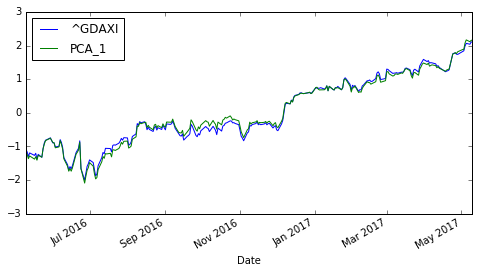

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8, 4))
# tag: pca_1
# title: German DAX index and PCA index with 1 component

In [18]:
pca = KernelPCA(n_components=6).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.lambdas_)
dax['PCA_6'] = np.dot(pca_components, weights)

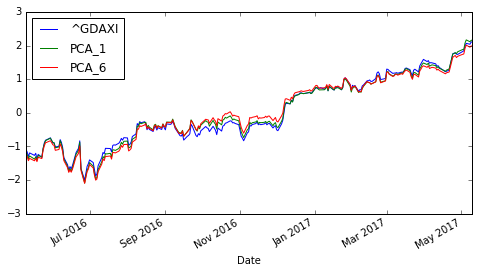

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8, 4))
# tag: pca_2
# title: German DAX index and PCA indices with 1 and 6 components

In [20]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates

array([ 736094.,  736095.,  736096.,  736097.,  736101.,  736102.,
        736103.,  736104.,  736107.,  736108.,  736109.,  736110.,
        736111.,  736114.,  736115.,  736116.,  736117.,  736118.,
        736121.,  736122.,  736123.,  736124.,  736125.,  736128.,
        736129.,  736130.,  736131.,  736132.,  736135.,  736136.,
        736137.,  736138.,  736139.,  736142.,  736143.,  736144.,
        736145.,  736146.,  736149.,  736150.,  736151.,  736152.,
        736153.,  736156.,  736157.,  736158.,  736159.,  736160.,
        736163.,  736164.,  736165.,  736166.,  736167.,  736170.,
        736171.,  736172.,  736173.,  736174.,  736177.,  736178.,
        736179.,  736180.,  736181.,  736184.,  736185.,  736186.,
        736187.,  736188.,  736191.,  736192.,  736193.,  736194.,
        736195.,  736198.,  736199.,  736200.,  736201.,  736202.,
        736205.,  736206.,  736207.,  736208.,  736209.,  736212.,
        736213.,  736214.,  736215.,  736216.,  736219.,  7362

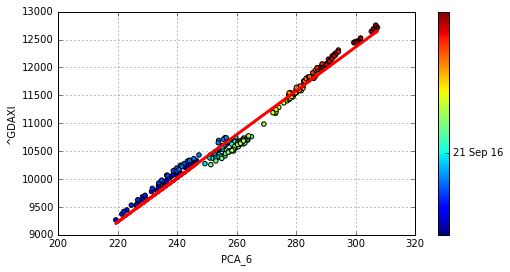

In [27]:
plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_6'], dax['^GDAXI'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_6'],
                                dax['^GDAXI'], 1),
                                dax['PCA_6'])
plt.plot(dax['PCA_6'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_6')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))
# tag: pca_3
# title: DAX return values against PCA return values with linear regression

In [22]:
cut_date = '2016/9/21'
early_pca = dax[dax.index < cut_date]['PCA_6']
early_reg = np.polyval(np.polyfit(early_pca,
                dax['^GDAXI'][dax.index < cut_date], 1),
                early_pca)

In [23]:
late_pca = dax[dax.index >= cut_date]['PCA_6']
late_reg = np.polyval(np.polyfit(late_pca,
                dax['^GDAXI'][dax.index >= cut_date], 1),
                late_pca)

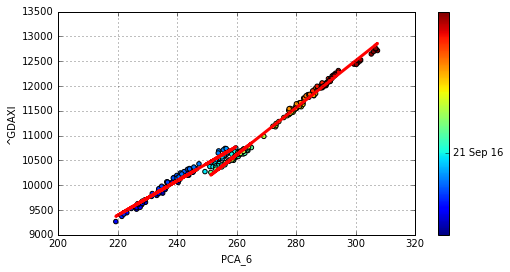

In [24]:
plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_6'], dax['^GDAXI'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_6')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))
# tag: pca_7
# title: DAX index values against PCA index values with early and late regression (regime switch)